In [5]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import libs

In [6]:
# Set global theme settings for plotting
plt.rcParams.update({
    'font.size': 20,          # Set font size
    'lines.linewidth': 3,     # Set default line thickness
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # Axis label font size
    'xtick.labelsize': 14,    # X-tick label font size
    'ytick.labelsize': 14,    # Y-tick label font size
    'grid.color': 'gray',     # Grid color
    'grid.linestyle': '--',   # Grid line style
    'grid.linewidth': 0.5,    # Grid line width
    'legend.fontsize': 16     # Legend font size
})

colorslist = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [7]:
#When available I use Ud estimates from deep sequencing studies and constraint estimates (KC). This studies are referenced next to the extimate.

#If these Ud estimates are not available I used the average for Ud and sd for studies that meassure relative fitness (w) in MA lines.
#doi: 10.1146/annurev.ecolsys.39.110707.173437

EcoliUd = 0.00017 #MA https://doi.org/10.1038/381694a0
Ecolisd = -0.012 #MA https://doi.org/10.1038/381694a0

#synergistic epistasis doi: 10.1534/genetics.107.080853
#Haploid lines (see doi.org/10.1534/genetics.104.033761 for diploid estimates)
ScervisiaeUd = 0.0011 #doi: 10.1093/genetics/159.2.441. Estimated from the proportion of unmutates strains in a MA experiment assuming mutations follow a Poisson distribution
Scervisiaesd = -0.086 #doi: 10.1093/genetics/159.2.441. MA estimate

#synergistic epistasis doi:10.1093/molbev/msy213
CelegansUd = 0.48 #KC method using nonsynonymous to synonimous constraint in exon sequences https://doi.org/10.1038/nature02697. Mutation rates infered from MA lines.
Celeganssd = -0.00365 #Average between low and high fitness C. elegans from Table S7 https://doi.org/10.1093/molbev/msy213 . selection coefficeint from MA lines.

DmelanogasterUd = 1.2 #KC method doi:10.1038/nature05388. Mutation rates infered from MA lines.
Dmelanogastersd = -0.03165 

VSVUd = 1.22 #Average of the Mukai-Bateman's method for three MA viral lines
VSVsd = -0.00227

MuridUd = 0.6 #KC method doi:10.1093/molbev/msp219. Mutation rate infered from substitution rates in ancestral repeats times the divergence times between species.as_integer_ratio
#Muridsd = 

PopulationSize = 10000
iterations = 1000


Uds_across = np.array([EcoliUd, ScervisiaeUd, CelegansUd, DmelanogasterUd, VSVUd])
sds_across = np.array([Ecolisd, Scervisiaesd, Celeganssd, Dmelanogastersd, VSVsd])

xmean_across = -Uds_across/sds_across

R_epistasis_across = np.linspace(0.8, 1.2, 100)

xmean_across

array([1.41666667e-02, 1.27906977e-02, 1.31506849e+02, 3.79146919e+01,
       5.37444934e+02])

In [8]:
lead_across = np.zeros((len(Uds_across), len(R_epistasis_across)))
selective_deaths_accross = np.zeros((len(Uds_across), len(R_epistasis_across)))
# Calculate selective deaths for each Uds and R_epistasis_across
for i in range(len(Uds_across)):
    expected_min, std_error_min, expected_max, std_error_max = libs.get_expected_min_max_poisson_sample(xmean_across[i], PopulationSize, iterations)
    for j in range(len(R_epistasis_across)):
        selective_deaths_accross[i, j] = libs.get_selective_deaths(xmean_across[i], expected_min, expected_max, sds_across[i], R_epistasis_across[j])
        lead_across[i, j] = libs.get_best_fitness(xmean_across[i], expected_min, expected_max, sds_across[i], R_epistasis_across[j])-1.0
#selective_deaths_accross[2]

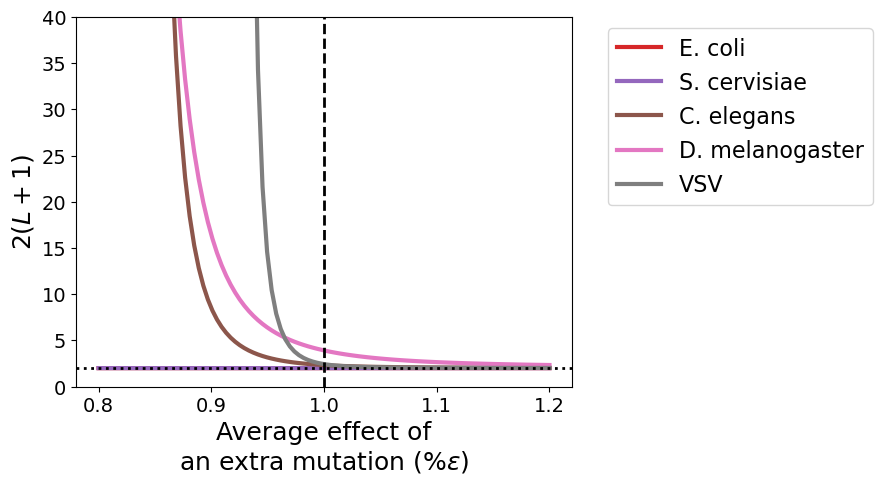

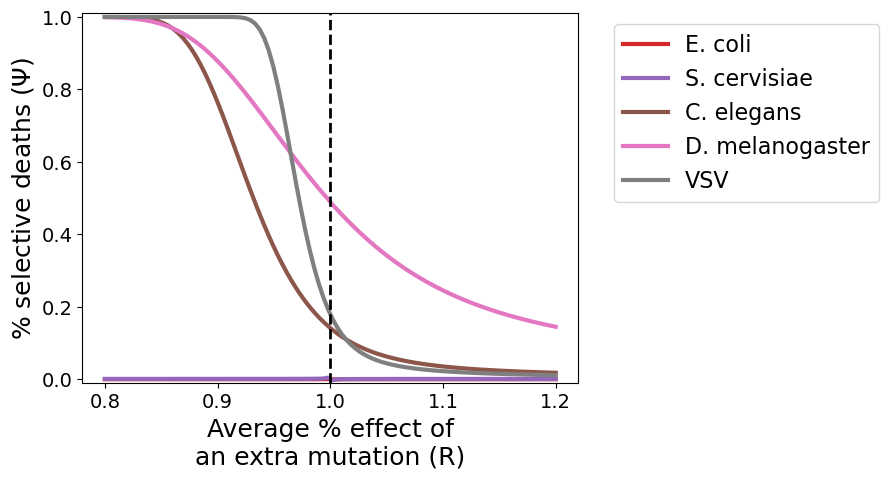

In [11]:
fig = plt.figure()
ax = fig.gca()
ax.plot(R_epistasis_across, 2*(lead_across[0]+1), color = colorslist[3], label="E. coli")
ax.plot(R_epistasis_across, 2*(lead_across[1]+1), color = colorslist[4], label="S. cervisiae")
ax.plot(R_epistasis_across, 2*(lead_across[2]+1), color = colorslist[5], label="C. elegans")
ax.plot(R_epistasis_across, 2*(lead_across[3]+1), color = colorslist[6], label="D. melanogaster")
ax.plot(R_epistasis_across, 2*(lead_across[4]+1), color = colorslist[7], label="VSV")
#ax.set_xscale('log', base=10, subs=[10**x for x in (0.5, 0.75)])
#ax.set_yscale('log', base=10, subs=[10**x for x in (2, 5, 20)])
ax.set_ylim(0, 40)
ax.set_xlabel('Average effect of\nan extra mutation (%' + r'$\epsilon$' + ')')
ax.set_ylabel(r'$2(L+1)$')
ax.axvline(x=1, color='black', linestyle='--', linewidth=2)
ax.axhline(y=2, color='black', linestyle='dotted', linewidth=2)  # Vertical line at x=2
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#fig.savefig('graphs/Lead_across.png', bbox_inches='tight') 
plt.show()
plt.close()


fig = plt.figure()
ax = fig.gca()
ax.plot(R_epistasis_across, selective_deaths_accross[0], color = colorslist[3], label="E. coli")
ax.plot(R_epistasis_across, selective_deaths_accross[1], color = colorslist[4], label="S. cervisiae")
ax.plot(R_epistasis_across, selective_deaths_accross[2], color = colorslist[5], label="C. elegans")
ax.plot(R_epistasis_across, selective_deaths_accross[3], color = colorslist[6], label="D. melanogaster")
ax.plot(R_epistasis_across, selective_deaths_accross[4], color = colorslist[7], label="VSV")
#ax.set_xscale('log', base=10, subs=[10**x for x in (0.25, 0.5, 0.75)])
ax.set_xlabel('Average % effect of\nan extra mutation (R)')
ax.set_ylabel('% selective deaths ' + r'$(\Psi)$')
ax.axvline(x=1, color='black', linestyle='--', linewidth=2) 
ax.set_ylim(-0.01,1.01)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#fig.savefig('graphs/Selectivedeaths_Boyko.png', bbox_inches='tight') 
plt.show()
plt.close()
